In [63]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import time

#---
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans

from IPython.display import Math

import warnings
warnings.filterwarnings('ignore')

In [186]:
df = pd.read_csv("titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [187]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [188]:
#EDA
df.shape

(891, 12)

In [189]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [190]:
column_names = df.columns
column_names

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [191]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [192]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [193]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [211]:
trainMeans = df.groupby(['Pclass', 'Sex'])['Age'].mean()
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]
df['Age'] = df.apply(f, axis=1)
#self.test['Age'] = self.test.apply(f, axis=1)

In [234]:
df['Embarked']=df['Embarked'].fillna(df['Embarked'].mode()[0])

In [235]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
Cabin_mode     0
dtype: int64

In [237]:
# List of features to be dropped
features_to_drop = ["Cabin_mode"]

# Drop the specified features from the concatenated DataFrame
df.drop(features_to_drop, axis=1, inplace=True)

df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C23 C25 C27,S
5,6,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,C23 C25 C27,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,C23 C25 C27,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,C23 C25 C27,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C23 C25 C27,C


In [238]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [239]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C23 C25 C27,S
5,6,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,C23 C25 C27,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,C23 C25 C27,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,C23 C25 C27,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C23 C25 C27,C


In [244]:
train_df = pd.concat([df], axis=0, ignore_index=True)
train_df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,C23 C25 C27,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,C23 C25 C27,S
5,6,0,3,"Moran, Mr. James",1,26.507589,0,0,330877,8.4583,C23 C25 C27,Q
6,7,0,1,"McCarthy, Mr. Timothy J",1,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",1,2.000000,3,1,349909,21.0750,C23 C25 C27,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.000000,0,2,347742,11.1333,C23 C25 C27,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",0,14.000000,1,0,237736,30.0708,C23 C25 C27,C


In [246]:
y_train = df["Survived"]
y_train.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [247]:
# Find missing values in each column of the Dataframe
missing_values = train_df.isna().sum()

# Filter columns where the count of missing values is greater than 0
# This creates a boolean mask where 'True' indicates columns with missing values
missing_values_greater_than_zero = missing_values[missing_values > 0]

# Print or use the resulting Series to see columns with missing values and their respective counts
print(missing_values_greater_than_zero)

Series([], dtype: int64)


In [248]:
# List of features to be dropped
features_to_drop = ["PassengerId"]

# Drop the specified features from the concatenated DataFrame
train_df.drop(features_to_drop, axis=1, inplace=True)

# Now, train_df does not contain the specified features
train_df.head(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C


In [249]:
# Extract titles from the 'Name' column and create a new column 'surname'
train_df['surname'] = train_df['Name'].str.extract(r',\s*([^\.]+)\s*\.', expand=False)

In [250]:
# Mapping for specific titles
title_mapping = {
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master'
}

# Create the new column 'new_surname' based on the mapping
train_df['new_surname'] = train_df['surname'].map(title_mapping).fillna('Others')

In [251]:
# List of features to be dropped
features_to_drop = ["Name","surname"]

# Drop the specified features from the concatenated DataFrame
train_df.drop(features_to_drop, axis=1, inplace=True)

# Now, train_df does not contain the specified features
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_surname
0,0,3,1,22.0,1,0,A/5 21171,7.2500,C23 C25 C27,S,Mr
1,1,1,0,38.0,1,0,PC 17599,71.2833,C85,C,Mrs


In [252]:
# Calculate average age for each new_surname group
average_age_by_surname = train_df.groupby('new_surname')['Age'].mean().round().astype(int)

# Fill missing age values with average age based on new_surname
train_df['new_Age'] = train_df.apply(lambda row: average_age_by_surname[row['new_surname']] 
                                                if pd.isnull(row['Age']) 
                                                else row['Age'], axis=1)

In [253]:
# List of features to be dropped
features_to_drop = ["Age", "new_surname"]

# Drop the specified features from the concatenated DataFrame
train_df.drop(features_to_drop, axis=1, inplace=True)

# Now, train_df does not contain the specified features
train_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,new_Age
0,0,3,1,1,0,A/5 21171,7.2500,C23 C25 C27,S,22.0
1,1,1,0,1,0,PC 17599,71.2833,C85,C,38.0


# Embarked

In [254]:
# Calculate the overall average fare
average_fare = train_df['Fare'].mean()

# Fill null 'Fare' values with the overall average fare
train_df['Fare'] = train_df['Fare'].fillna(average_fare/5)

In [256]:
# Group by 'Embarked' and calculate frequency and mean of 'Fare'
embarked_stats = train_df.groupby('Embarked').agg({'Embarked': 'count', 'Fare': 'mean'}).rename(columns={'Embarked': 'Frequency', 'Fare': 'Mean Fare'})

# Print the frequency and mean fare for each 'Embarked' value
print(embarked_stats)

          Frequency  Mean Fare
Embarked                      
C               168  59.954144
Q                77  13.276030
S               646  27.243651


In [258]:
# Find rows where 'Fare' column is null
rows_with_null_fare = train_df[train_df['Embarked'].isnull()]

# Print the rows with null 'Fare'
print(rows_with_null_fare)

Empty DataFrame
Columns: [Survived, Pclass, Sex, SibSp, Parch, Ticket, Fare, Cabin, Embarked, new_Age]
Index: []


In [259]:
# Fill null values in 'Embarked' column with 'C'
train_df['Embarked'] = train_df['Embarked'].fillna('C')

In [260]:
train_df.drop('Ticket', axis=1, inplace=True)
train_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked,new_Age
0,0,3,1,1,0,7.2500,C23 C25 C27,S,22.0
1,1,1,0,1,0,71.2833,C85,C,38.0


In [261]:
# Create a new feature indicating whether Cabin information is missing or not
train_df['Cabin_Missing'] = train_df['Cabin'].isnull().astype(int)

# Extract the first letter of the Cabin as a new feature (if available), replace NaN and 'T' with 'Z'
train_df['Cabin_Letter'] = train_df['Cabin'].str[0].apply(lambda x: 'Z' if pd.isnull(x) or x == 'T' else x)

In [262]:
custom_colors = ['#FF5733', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', 
                 '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', '#00D2D3', '#FF5733', 
                 '#900C3F', '#581845', '#FFC300', '#DAF7A6', '#1287A5', '#F4D03F', 
                 '#00D2D3', '#FF5733']

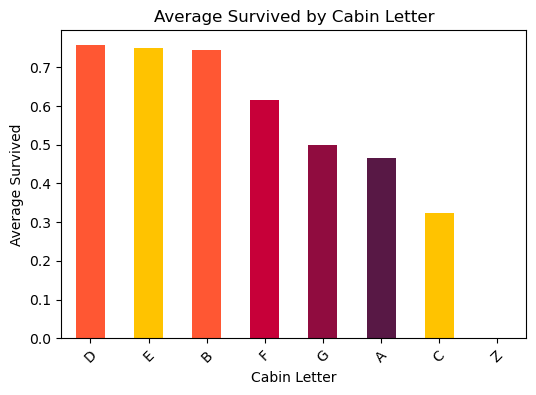

              count      mean       std  min   25%  50%  75%  max
Cabin_Letter                                                     
A              15.0  0.466667  0.516398  0.0  0.00  0.0  1.0  1.0
B              47.0  0.744681  0.440755  0.0  0.50  1.0  1.0  1.0
C             746.0  0.323056  0.467958  0.0  0.00  0.0  1.0  1.0
D              33.0  0.757576  0.435194  0.0  1.00  1.0  1.0  1.0
E              32.0  0.750000  0.439941  0.0  0.75  1.0  1.0  1.0
F              13.0  0.615385  0.506370  0.0  0.00  1.0  1.0  1.0
G               4.0  0.500000  0.577350  0.0  0.00  0.5  1.0  1.0
Z               1.0  0.000000       NaN  0.0  0.00  0.0  0.0  0.0


In [263]:
# Calculate average SalePrice for each MSZoning category
average_cabin = train_df.groupby('Cabin_Letter')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_cabin.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Cabin Letter')
plt.xlabel('Cabin Letter')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

# Summary statistics for SalePrice grouped by MSZoning
summary_stats = train_df.groupby('Cabin_Letter')['Survived'].describe()
print(summary_stats)

In [266]:
# List of features to be dropped
#features_to_drop = ["Cabin","Cabin_Missing"]

# Drop the specified features from the concatenated DataFrame
#train_df.drop(features_to_drop, axis=1, inplace=True)

KeyError: "['Cabin', 'Cabin_Missing'] not found in axis"

In [267]:
# train_df["Cabin_Letter"].head(50)
# Create binary columns for each unique letter in the "Cabin_Letter" column
cabin_letter_dummies = pd.get_dummies(train_df["Cabin_Letter"])

# Rename the columns to indicate the presence of specific letters
cabin_letter_dummies.columns = ["Cabin_" + letter for letter in cabin_letter_dummies.columns]

# Concatenate the binary columns with the original DataFrame
train_df = pd.concat([train_df, cabin_letter_dummies], axis=1)

In [268]:
# Drop the original "Cabin_Letter" column
train_df.drop("Cabin_Letter", axis=1, inplace=True)

In [269]:
train_df.head(2)

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z
0,0,3,1,1,0,7.2500,S,22.0,False,False,True,False,False,False,False,False
1,1,1,0,1,0,71.2833,C,38.0,False,False,True,False,False,False,False,False


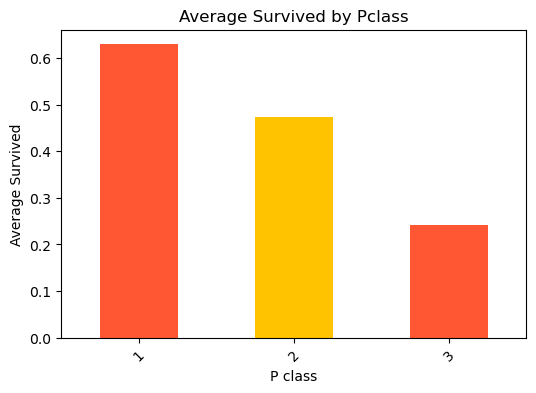

In [270]:
# Calculate average SalePrice for each MSZoning category
average_pClass = train_df.groupby('Pclass')['Survived'].mean().sort_values(ascending=False)

# Bar plot to visualize average SalePrice for each MSZoning category
plt.figure(figsize=(6, 4))
average_pClass.plot(kind='bar', color=custom_colors)
plt.title('Average Survived by Pclass')
plt.xlabel('P class')
plt.ylabel('Average Survived')
plt.xticks(rotation=45)
plt.show()

In [271]:
# Create binary columns for each unique class in the "Pclass" column
pclass_dummies = pd.get_dummies(train_df["Pclass"])

# Rename the columns to indicate the presence of specific classes
pclass_dummies.columns = ["PClass_" + str(class_num) for class_num in pclass_dummies.columns]

# Concatenate the binary columns with the original DataFrame
train_df = pd.concat([train_df, pclass_dummies], axis=1)

# Drop the original "Pclass" column
train_df.drop("Pclass", axis=1, inplace=True)

# Print the updated DataFrame
train_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Embarked,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3
0,0,1,1,0,7.2500,S,22.0,False,False,True,False,False,False,False,False,False,False,True
1,1,0,1,0,71.2833,C,38.0,False,False,True,False,False,False,False,False,True,False,False


In [272]:
label_encoder = LabelEncoder()

categorical_columns = train_df.select_dtypes(include=['O']).columns.tolist()

for column in categorical_columns:
    train_df[column] = label_encoder.fit_transform(train_df[column])
    
train_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Embarked,new_Age,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3
0,0,1,1,0,7.2500,2,22.0,False,False,True,False,False,False,False,False,False,False,True
1,1,0,1,0,71.2833,0,38.0,False,False,True,False,False,False,False,False,True,False,False


# Age

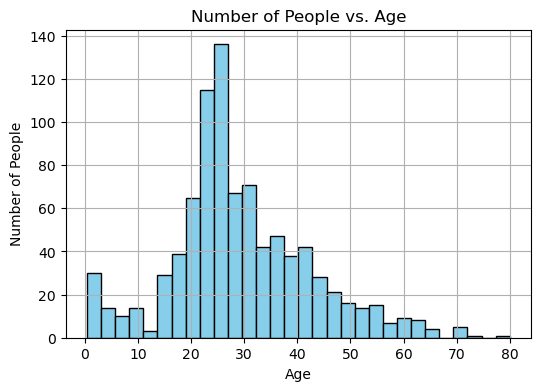

In [273]:
# Plot a histogram of the 'Age' column
plt.figure(figsize=(6, 4))
plt.hist(train_df["new_Age"], bins=30, color='skyblue', edgecolor='black')
plt.title('Number of People vs. Age')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

In [274]:
# Define bins and labels for age groups
bins = [0, 10, 20, 30, 45, 60, float('inf')]
labels = [0, 1, 2, 3, 2, 1]

# Create a new column 'AgeGroup' based on the 'Age' column
train_df['AgeGroup'] = pd.cut(train_df['new_Age'], bins=bins, labels=labels, right=False,ordered=False)

train_df.drop('new_Age', axis=1, inplace=True)

# Print the DataFrame with the new 'AgeGroup' column
train_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,AgeGroup
0,0,1,1,0,7.2500,2,False,False,True,False,False,False,False,False,False,False,True,2
1,1,0,1,0,71.2833,0,False,False,True,False,False,False,False,False,True,False,False,3


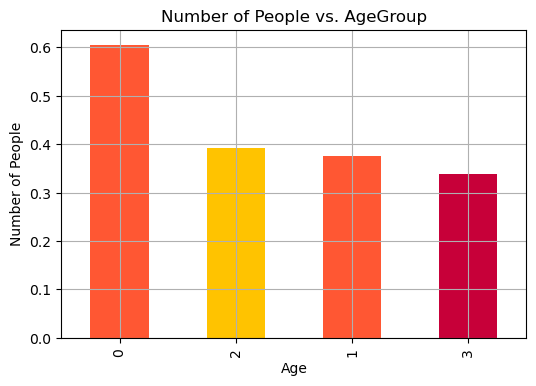

In [104]:
average_AgeGroup = train_df.groupby('AgeGroup')['Survived'].mean().sort_values(ascending=False)
# Plot a histogram of the 'Age' column

plt.figure(figsize=(6, 4))
average_AgeGroup.plot(kind='bar', color=custom_colors)
plt.title('Number of People vs. AgeGroup')
plt.xlabel('Age')
plt.ylabel('Number of People')
plt.grid(True)
plt.show()

# Family

In [275]:
# Convert 'SibSp' and 'Parch' based on specified conditions
train_df['SibSp'] = train_df['SibSp'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)
train_df['Parch'] = train_df['Parch'].apply(lambda x: 0 if x == 0 else 2 if x in [1, 2] else 1)

# Print the updated DataFrame
train_df.head(2)

,Survived,Sex,SibSp,Parch,Fare,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,AgeGroup
0,0,1,2,0,7.2500,2,False,False,True,False,False,False,False,False,False,False,True,2
1,1,0,2,0,71.2833,0,False,False,True,False,False,False,False,False,True,False,False,3


# Fare Prices

In [276]:
# Convert the fare data to a NumPy array
fare_data = np.array(train_df["Fare"])
print(fare_data)

[  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55     8.05    31.275    7.8542  16.
  29.125   13.      18.       7.225   26.      13.       8.0292  35.5
  21.075   31.3875   7.225  263.       7.8792   7.8958  27.7208 146.5208
   7.75    10.5     82.1708  52.       7.2292   8.05    18.      11.2417
   9.475   21.       7.8958  41.5792   7.8792   8.05    15.5      7.75
  21.6792  17.8     39.6875   7.8     76.7292  26.      61.9792  35.5
  10.5      7.2292  27.75    46.9      7.2292  80.      83.475   27.9
  27.7208  15.2458  10.5      8.1583   7.925    8.6625  10.5     46.9
  73.5     14.4542  56.4958   7.65     7.8958   8.05    29.      12.475
   9.       9.5      7.7875  47.1     10.5     15.85    34.375    8.05
 263.       8.05     8.05     7.8542  61.175   20.575    7.25     8.05
  34.6542  63.3583  23.      26.       7.8958   7.8958  77.2875   8.6542
   7.925    7.8958   7.65     7.775    7.8958  24.15    52.      14.4542
  

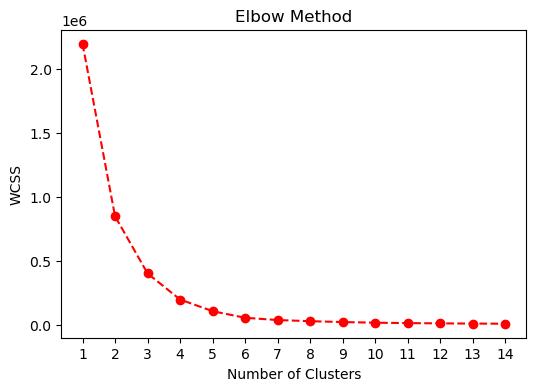

In [277]:
# Calculate WCSS for different values of k
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(fare_data.reshape(-1, 1))
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(6, 4))
plt.plot(range(1, 15), wcss, marker='o', linestyle='--',color="red")
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares
plt.xticks(np.arange(1, 15, 1))
plt.show()

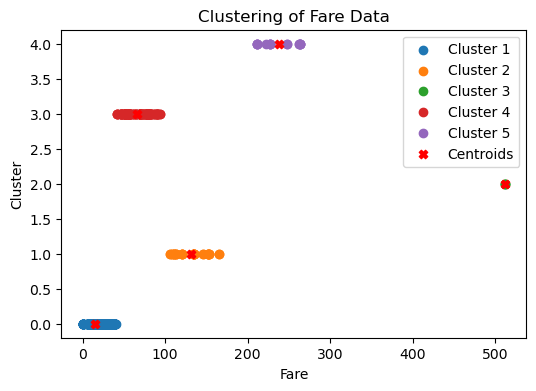

Cluster Labels:
[0 3 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0 1 0 0 3 3 0
 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 3 0 3 3 0 0 0 0 0 0 0 0 3 3 0
 3 0 0 0 0 0 0 0 0 3 0 0 0 0 4 0 0 0 3 0 0 0 0 3 0 0 0 0 3 0 0 0 0 0 0 0 3
 0 0 0 0 0 0 0 4 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 3 0 3 0 0 0 0 0 0 0 0
 0 0 0 3 0 0 0 3 0 0 0 3 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0
 3 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 3 0 0 0
 0 0 3 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 3 0 0 0 0 0 0 0 3 3 2
 0 0 0 3 0 0 0 0 0 1 1 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0
 0 1 0 4 0 0 0 0 0 1 1 1 0 3 3 4 0 0 0 0 0 0 1 1 0 0 0 0 3 1 0 0 0 3 0 0 1
 0 1 0 3 1 0 0 0 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 3 0 0 3
 3 0 0 1 0 3 0 4 0 0 4 0 0 3 0 3 3 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 1 0 0 4 0 0 0 0 0
 0 3 0 0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 0 0 0 0 3
 0 0 0 3 

In [113]:
# Convert the fare data to a NumPy array
fare_data = np.array(train_df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Define the optimal number of clusters (found using the Elbow Method)
optimal_clusters = 5

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Visualize the clusters and data points
plt.figure(figsize=(6, 4))
for i in range(optimal_clusters):
    plt.scatter(fare_data_reshaped[cluster_labels == i], [i] * len(fare_data_reshaped[cluster_labels == i]), label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_, np.arange(optimal_clusters), color='red', marker='X', label='Centroids')
plt.xlabel('Fare')
plt.ylabel('Cluster')
plt.title('Clustering of Fare Data')
plt.legend()
plt.show()

# Output the cluster labels for each data point
print("Cluster Labels:")
print(cluster_labels)

In [278]:
# Assuming you have determined the optimal number of clusters (optimal_clusters) using the Elbow Method
optimal_clusters = 5  # Replace this with the actual optimal number of clusters

# Fare data (assuming you already have this data)
fare_data = np.array(train_df["Fare"])

# Reshape the fare data to be a 2D array
fare_data_reshaped = fare_data.reshape(-1, 1)

# Apply KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=0)
cluster_labels = kmeans.fit_predict(fare_data_reshaped)

# Add the cluster labels as a new column to the DataFrame
concatenated_df["Fare_Cluster"] = cluster_labels

In [279]:
# List of features to be dropped
features_to_drop = ["Fare"]

# Drop the specified features from the concatenated DataFrame
train_df.drop(features_to_drop, axis=1, inplace=True)

# Now, concatenated_df does not contain the specified features
train_df.head(2)

,Survived,Sex,SibSp,Parch,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,AgeGroup
0,0,1,2,0,2,False,False,True,False,False,False,False,False,False,False,True,2
1,1,0,2,0,0,False,False,True,False,False,False,False,False,True,False,False,3


# Draw Charts

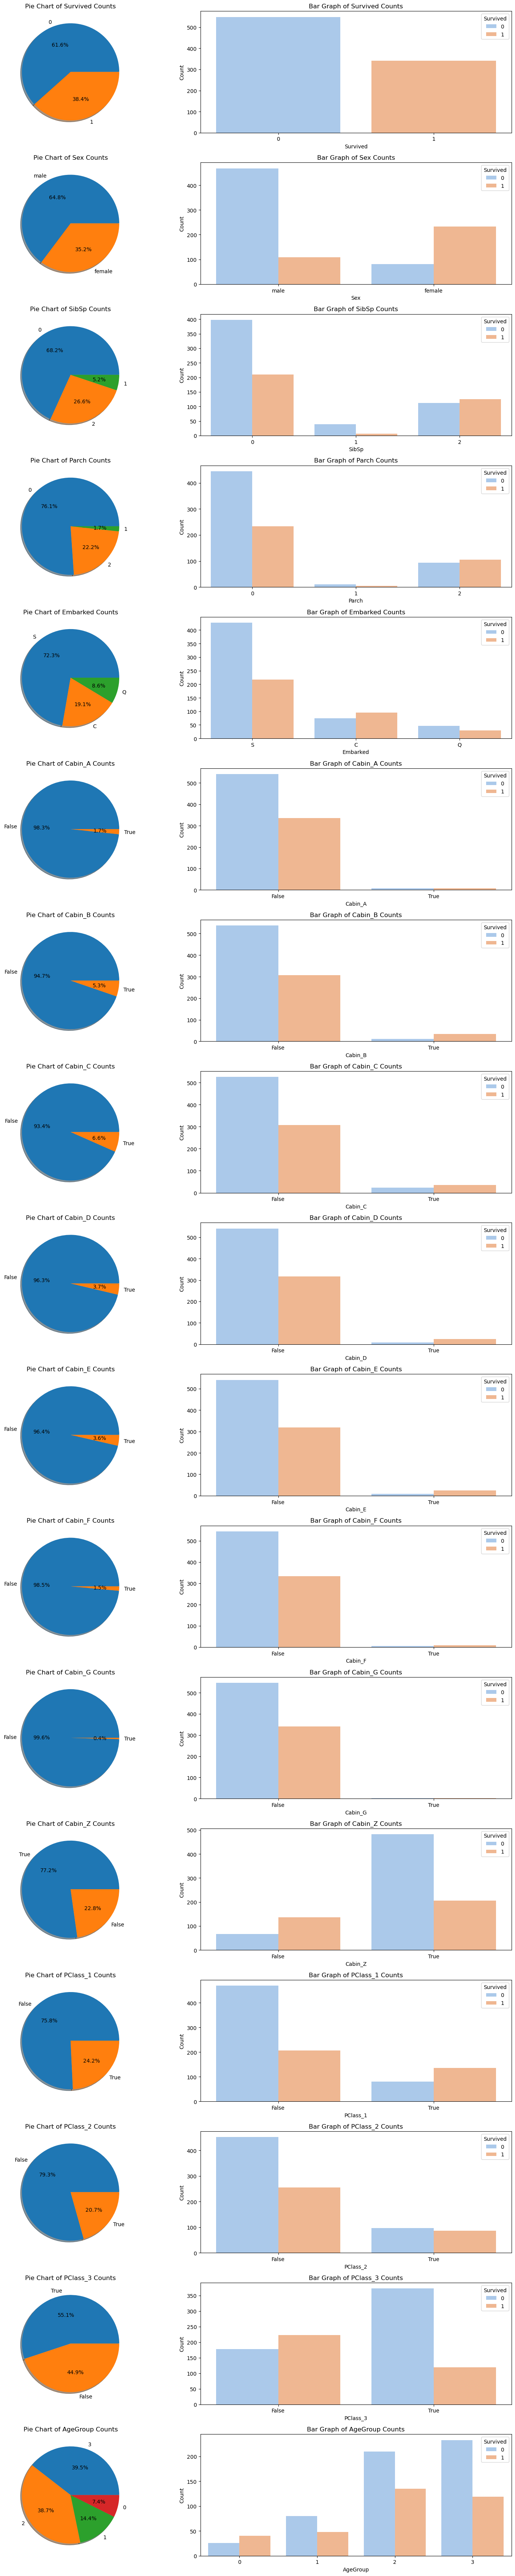

In [117]:
# Assuming univalue_columns is a list of column names containing unique values
columns_list = train_df.columns

# Set up subplots
fig, axs = plt.subplots(len(columns_list), 2, figsize=(16, 4 * len(columns_list)))

for i, column in enumerate(columns_list):
    count_labels = train_df[column].value_counts()

    # Plot pie chart
    axs[i, 0].pie(count_labels, labels=count_labels.index, autopct='%.1f%%', shadow=True)
    axs[i, 0].set_title(f'Pie Chart of {column} Counts')

    # Plot countplot
    sns.countplot(data=train_df, x=column, hue='Survived', palette='pastel', ax=axs[i, 1])
    axs[i, 1].set_title(f'Bar Graph of {column} Counts')
    axs[i, 1].set_ylabel('Count')  # Assuming you want a y-label for the countplot

# Adjust layout and show plots
plt.tight_layout()
plt.show()

In [118]:
train_df.drop('Survived', axis=1, inplace=True)
train_df.head(2)

,Sex,SibSp,Parch,Embarked,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_Z,PClass_1,PClass_2,PClass_3,AgeGroup
0,male,2,0,S,False,False,False,False,False,False,False,True,False,False,True,2
1,female,2,0,C,False,False,True,False,False,False,False,False,True,False,False,3


# REGRESSION

In [281]:
df1 = df.drop(columns = ['Name','Sex','Ticket','Cabin','Embarked'])
df1

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.00,1,0,7.2500
1,2,1,1,38.00,1,0,71.2833
2,3,1,3,26.00,0,0,7.9250
3,4,1,1,35.00,1,0,53.1000
4,5,0,3,35.00,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,13.0000
887,888,1,1,19.00,0,0,30.0000
888,889,0,3,21.75,1,2,23.4500
889,890,1,1,26.00,0,0,30.0000


In [285]:
# Get the index where the train and test data were originally separated
train_data_index = len(train_df)
#test_data_index = len(train_df) - len(test_df)

# Split the concatenated data back into train and test sets
X_train = train_df[:train_data_index]
#X_test = concatenated_df[test_data_index:]

In [286]:
# Initialize the models
LogisticRegression_reg = LogisticRegression()
svc_reg = SVC()
KNeighborsClassifier_reg =  KNeighborsClassifier(n_neighbors = 3)
linear_svc = LinearSVC()
decision_tree_reg = DecisionTreeClassifier()
random_forest_reg = RandomForestClassifier(n_estimators=100)

In [287]:
# Train the models
LogisticRegression_reg.fit(X_train, y_train)
svc_reg.fit(X_train, y_train)
KNeighborsClassifier_reg.fit(X_train, y_train)
linear_svc.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestClassifier()

In [289]:
# Make predictions using the trained models
LogisticRegression_reg_preds = LogisticRegression_reg.predict(X_train)
svc_reg_preds = svc_reg.predict(X_train)
KNeighborsClassifier_reg_preds = KNeighborsClassifier_reg.predict(X_train)
linear_svc_reg_preds = linear_svc.predict(X_train)
decision_tree_reg_preds = decision_tree_reg.predict(X_train)
random_forest_reg_preds = random_forest_reg.predict(X_train)

In [290]:
# Create a DataFrame with predictions
predictions_df = pd.DataFrame({
    'Logistic Regression': LogisticRegression_reg_preds,
    'Support Vector Machines': svc_reg_preds,
    'KNN': KNeighborsClassifier_reg_preds,
    'Linear SVC': linear_svc_reg_preds,
    'Decision Tree': decision_tree_reg_preds,
    'Random Forest': random_forest_reg_preds
})

In [291]:
# Assuming your DataFrame is named 'predictions_df' Calculate the maximum value in each row
max_values = predictions_df.sum(axis=1)

# Set the answer to 1 if the maximum value in the row is 1, otherwise set it to 0
answers = max_values.apply(lambda x: 1 if x >=4  else 0)

# Correlation

In [294]:
df1 = df.drop(columns = ['Name','Sex','Ticket','Cabin','Embarked'])

In [295]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [296]:
df1.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.039636,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067485,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.407015,0.083081,0.018443,-0.549500
Age,0.039636,-0.067485,-0.407015,1.000000,-0.251313,-0.180705,0.118308
SibSp,-0.057527,-0.035322,0.083081,-0.251313,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.180705,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.118308,0.159651,0.216225,1.000000


# How to write project Analysis